# Loading the relevant libraries

In [1]:
import us
import pandas as pd
import numpy as np
from itertools import chain
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

## Let's choose some number of observations (500) and simulate some data

In [2]:
n = 500

In [3]:
# Arbitrarily defining 10 tags
tags = [ "Tag %i" % j for j in range(10)]

# Getting a list of states for the example
statelist = [j.name for j in us.states.STATES]
x1 = np.random.choice(statelist, n)
x2 = np.zeros(n)

# Sampling from states for categories
for i, state in enumerate(statelist):
    # Note for the second "x" we are sampling them all from the same gaussian
    x2[x1==state] =  np.random.normal( np.sum(x1==state) )  * (i/10.)

# Randomly sampling the number of tags and elements in list of tags
x3 = pd.Series(np.zeros(n), name='x3', dtype='O')
for i in range(n):
    k = np.random.choice(np.arange(len(tags)))
    x3.ix[i] = ','.join(np.random.choice(tags, k))

# Getting the unique tags
tags = sorted(set(list(chain(*[ j.split(",") for j in x3.unique()]))) )

# Creating a temporary dataframe for tracking the tags
x3tmp = pd.DataFrame(np.zeros([n, len(tags)]), columns= tags)
for i, rowtags in enumerate(x3):
    for tag in rowtags.split(","):
        # If a tag is found, populate the row and tag with 1
        if x3tmp.ix[i, tag]==0 :
            x3tmp.ix[i, tag] = 1

In [4]:
pd.concat([pd.Series(x1, name='State'), 
           pd.Series(x2, name='Hourly_Wage'), 
           pd.Series(x3, name='Tags')], axis=1).head()

,State,Hourly_Wage,Tags
0,Illinois,16.658666,"Tag 8,Tag 2,Tag 2,Tag 8,Tag 0,Tag 3,Tag 5,Tag ..."
1,Florida,7.934306,"Tag 9,Tag 0,Tag 8,Tag 3"
2,Texas,55.154027,"Tag 8,Tag 2,Tag 5,Tag 3"
3,Tennessee,30.900414,"Tag 8,Tag 9,Tag 0,Tag 0,Tag 7,Tag 0,Tag 3"
4,Wisconsin,54.594134,"Tag 9,Tag 9,Tag 9,Tag 8,Tag 1,Tag 2,Tag 5,Tag 5"


In [5]:
# Building matrix for K-means
X = pd.concat([pd.get_dummies(pd.Series(x1), sparse=True),
               pd.Series(x2, name='x2'),
               x3tmp],
              axis=1)
X_train, X_test = train_test_split(X, test_size=0.50, random_state=420)

In [6]:
# Let's evaluate the loss function on the test data
loss = []
for k in range(1, X_train.shape[0]):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train)
    loss.append(kmeans.score(X_test))

There should be 24 clusters


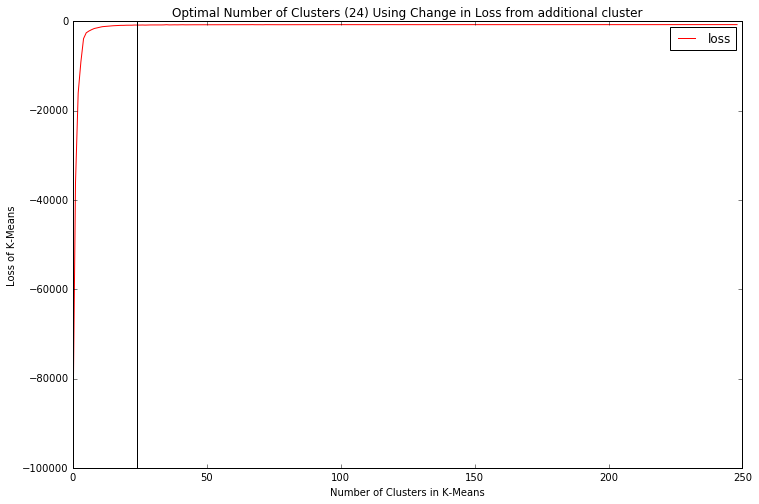

In [7]:
for i, (x,y) in enumerate(zip(loss, loss[1:] )):
    if (y-x) <= 0:
        clusterval = i+1
        print("There should be %i clusters" % clusterval )
        break

plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(loss)), loss, c='red', label='loss')
plt.axvline(clusterval, color='k', linestyle='solid')
plt.title("Optimal Number of Clusters (%i) Using Change in Loss from additional cluster" % clusterval)
plt.ylabel("Loss of K-Means")
plt.xlabel("Number of Clusters in K-Means")
plt.legend()
plt.show()